<a href="https://colab.research.google.com/github/sohil344/ANN/blob/main/Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Inpuit file can be foun on Kaggle- https://www.kaggle.com/code/campusx/gre-admission-prediction/input


In [46]:
import numpy as np
import pandas as pd


In [47]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [48]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [49]:
df.info()

#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [50]:
df.duplicated().sum()

#no duplicated row

0

In [51]:
df.shape

(500, 9)

In [52]:
df.drop(columns=['Serial No.'],inplace=True)  #eliminating serial no

In [53]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
X_train.shape


(400, 7)

In [57]:
X_test.shape

(100, 7)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [59]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [61]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [62]:
model=Sequential()


In [63]:
 model.add(Dense(7,activation='relu',input_dim=7))
 model.add(Dense(1,activation='linear'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [79]:
history=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0078
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0078
Epoch 10/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.0077
Epoch 11

In [77]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [74]:
from sklearn.metrics import r2_score

In [80]:
r2_score(y_test,y_pred)

0.5966478139914515

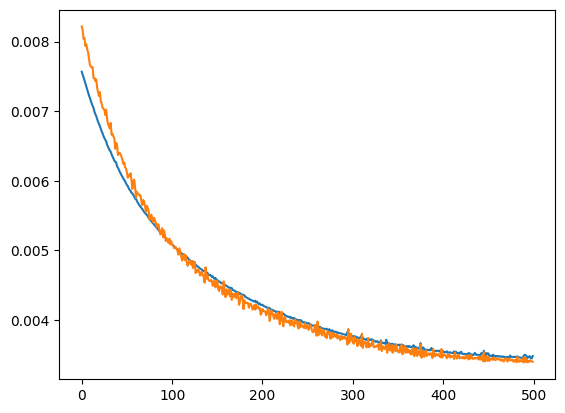

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#val loss and training loss seems to be close so we can model is trained well just need to focus on r2 score